<div class="alert alert-block alert-success">
<b>Problem (1)</b>
</div>

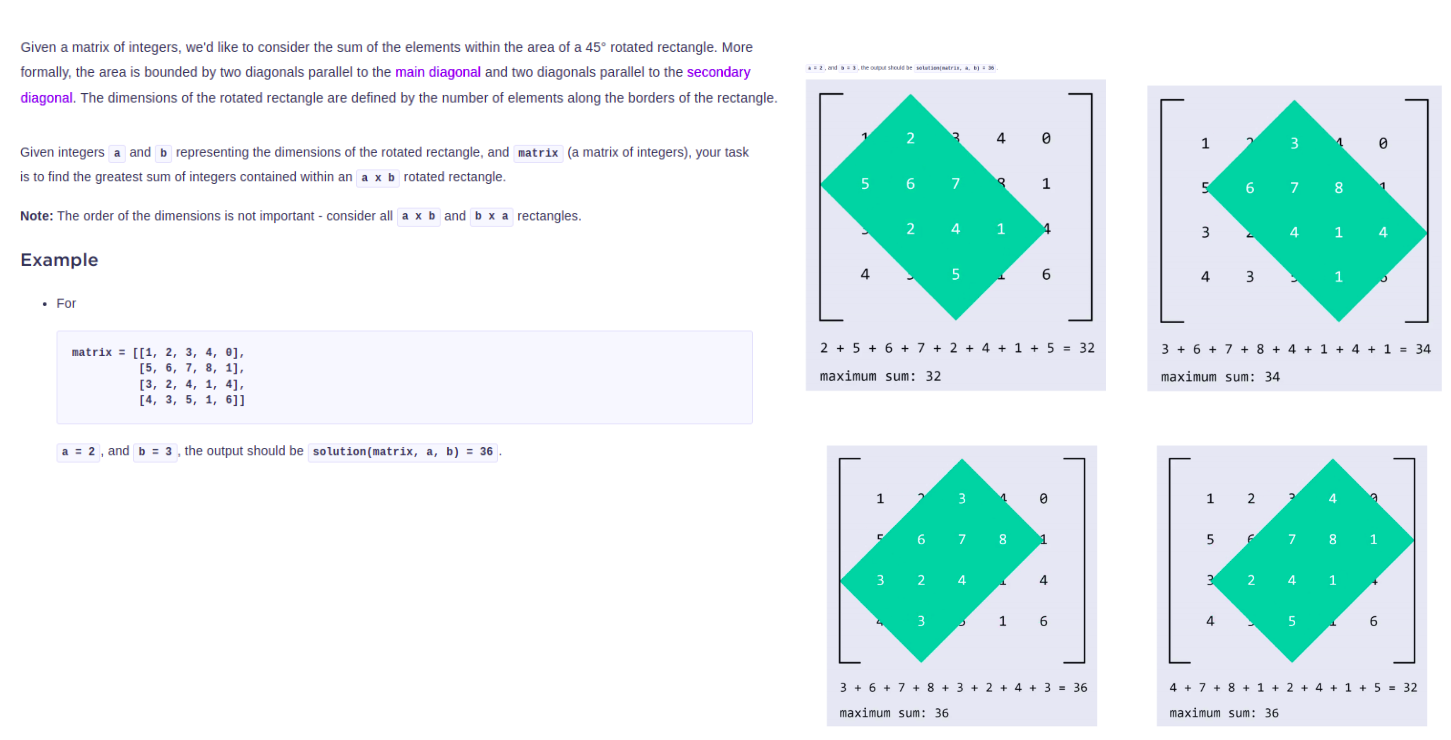

In [2]:
def solution(matrix, a, b):
    m = len(matrix)
    n = len(matrix[0])
    maxSum = float('-inf')
    
    # If we make a diagnoal line at the current index a and b represents
    # the number of element we can to include with respect to that line.
    # Since we have at least 1 element by being on an index, we subtract
    # 1 from both a and b to represent the index
    
    
    for x,y in ((a-1,b-1),(b-1,a-1)):
        
        # Slide through possible rectangles
        for row_min in range(0, m - x - y):
            for col_min in range(0, n - x - y):
                
                # Find sum of rectangle
                rec_sum = matrix[row_min][col_min+x]
                corner_left  = [row_min+x,col_min]
                corner_right = [row_min+y,col_min+x+y]
                j_min_step = -1
                j_max_step = 1
                
                # Start with top corner
                prev_index_left = prev_index_right = [row_min,col_min+x]
                
                for i in range(row_min+1,row_min+x+y+1):
                    j_min_step = j_min_step * -1 if prev_index_left == corner_left else j_min_step
                    j_max_step = j_max_step * -1 if prev_index_right == corner_right else j_max_step
                    j_min = prev_index_left[1] + j_min_step
                    j_max = prev_index_right[1] + j_max_step
                    
                    for j in range (j_min,j_max+1):
                        rec_sum += matrix[i][j]
                    prev_index_left = [i, j_min]
                    prev_index_right = [i, j_max]
                    
                maxSum = rec_sum if rec_sum > maxSum else maxSum
    
    return maxSum

<div class="alert alert-block alert-success">
<b>Problem (2)</b>
</div>

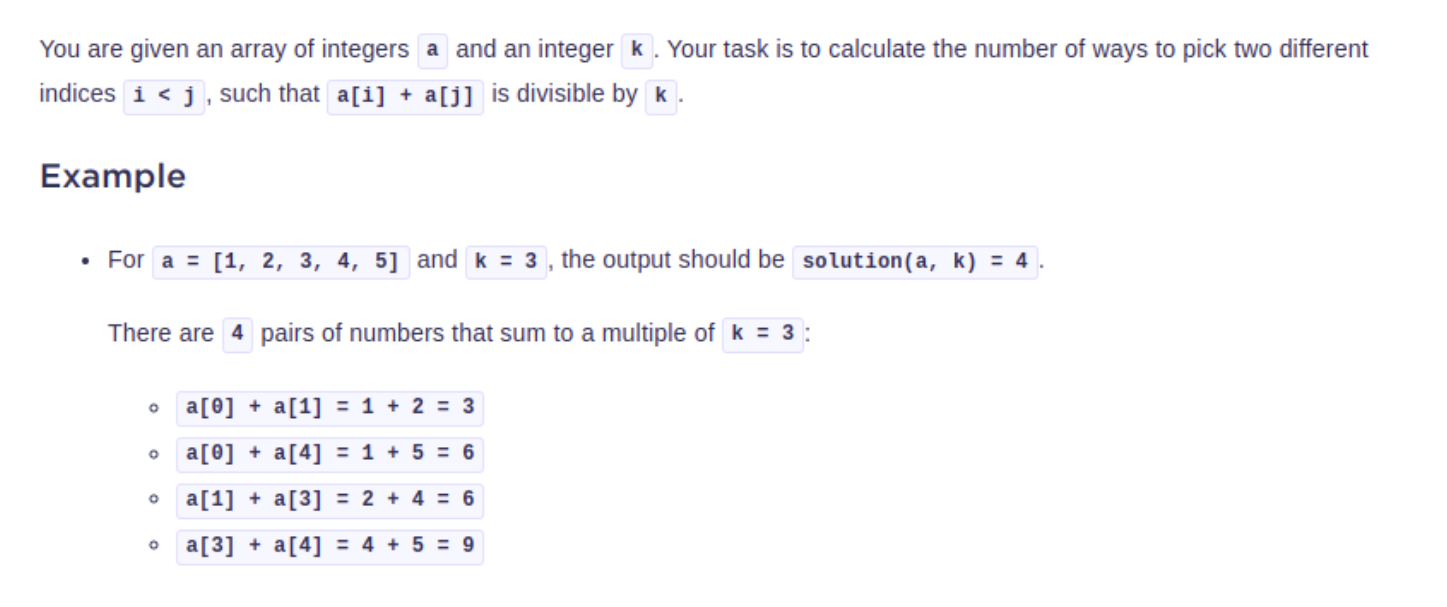

In [3]:
def coutPairs(nums, k):
        output = 0
        divisors = []
        counter = Counter()
        
        for i in range(1, k + 1):
            if k % i == 0:
                divisors.append(i)
        
        for i in range(0, len(nums)):
            remainder = k // math.gcd(k, nums[i])
            output += counter[remainder]
            
            for divisor in divisors:
                if nums[i] % divisor == 0:
                    counter[divisor] += 1
            
        return output

explanation: https://leetcode.com/problems/count-array-pairs-divisible-by-k/discuss/1785662/Python-line-by-line-detailed-explanation